# PCPs feature calculation using python packages *Peptides* and *PFeature*

In [ ]:
! pip install biopython
import pandas as pd
! pip install peptides
from Bio import SeqIO
import csv
from peptides import Peptide

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.4/115.4 kB 3.9 MB/s eta 0:00:00


In [ ]:
def calculate_peptide_properties(sequence):
    peptide = Peptide(sequence)
    properties = {
        'Sequence': sequence,
        'Molecular Weight': peptide.molecular_weight(),
        'Isoelectric Point': peptide.isoelectric_point(),
        'Hydrophobicity': peptide.hydrophobicity(),
        'Aliphatic Index': peptide.aliphatic_index(),
        'Charged': peptide.charge(),
        'Amphiphilicity': peptide.hydrophobic_moment(),

    }
    return properties


In [ ]:
fasta_file = '/content/Condensate modifying peptides.fasta'
sequences = []
for record in SeqIO.parse(fasta_file, 'fasta'):
    sequences.append(str(record.seq))

In [ ]:
properties_list = []
for seq in sequences:
    properties = calculate_peptide_properties(seq)
    properties_list.append(properties)

In [ ]:
csv_file = 'CMP_properties.csv'
with open(csv_file, 'w', newline='') as csvfile:
    fieldnames = ['Sequence', 'Molecular Weight', 'Isoelectric Point', 'Hydrophobicity', 'Aliphatic Index', 'Charged', 'Amphiphilicity']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for properties in properties_list:
        writer.writerow(properties)

print(f'Peptide properties have been saved to {csv_file}')

Peptide properties have been saved to CMP_properties.csv


In [ ]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

--2024-08-05 23:02:14--  https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip [following]
--2024-08-05 23:02:15--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519486 (507K) [application/zip]
Saving to: ‘Pfeature.zip’

Pfeature.zip        100%[===================>] 507.31K  --.-KB/s    in 0.05s   

2024-08-05 23:02:15 (10.4 MB/s) - ‘Pfeature.zip’ saved [519486/519486]



In [ ]:
!unzip Pfeature.zip



Archive:  Pfeature.zip
   creating: Pfeature/
  inflating: Pfeature/PKG-INFO       
   creating: __MACOSX/
   creating: __MACOSX/Pfeature/
  inflating: __MACOSX/Pfeature/._PKG-INFO  
  inflating: Pfeature/README         
  inflating: __MACOSX/Pfeature/._README  
  inflating: Pfeature/setup.py       
  inflating: __MACOSX/Pfeature/._setup.py  
  inflating: Pfeature/Functions_Tables.pdf  
  inflating: __MACOSX/Pfeature/._Functions_Tables.pdf  
   creating: Pfeature/build/
   creating: Pfeature/build/lib/
   creating: Pfeature/build/lib/Pfeature/
  inflating: Pfeature/build/lib/Pfeature/bonds.csv  
   creating: __MACOSX/Pfeature/build/
   creating: __MACOSX/Pfeature/build/lib/
   creating: __MACOSX/Pfeature/build/lib/Pfeature/
  inflating: __MACOSX/Pfeature/build/lib/Pfeature/._bonds.csv  
  inflating: Pfeature/build/lib/Pfeature/pfeature.py  
  inflating: __MACOSX/Pfeature/build/lib/Pfeature/._pfeature.py  
  inflating: Pfeature/build/lib/Pfeature/AAIndexNames.csv  
  inflating: __MACOSX

In [ ]:
%cd Pfeature

/content/Pfeature


In [ ]:
! python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://github.com/py

In [ ]:
from Pfeature.pfeature import pcp_wp

def pcp(input):
  a = input.rstrip('fasta')
  output = a + 'pcp.csv'
  df_out = pcp_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

pcp('/content/Condensate modifying peptides.fasta')

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,PCP_SA_EX,PCP_SA_IN,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5
0,0.000,0.000,1.000,0.25,0.250,0.250,0.00,0.25,0.000,0.000,...,0.500,0.25,0.250,0.750,0.250,1.403,0.405,0.718,-0.770,-1.268
1,0.375,0.250,0.375,0.00,0.375,0.375,0.25,0.00,0.250,0.375,...,0.750,0.25,0.125,0.375,0.625,1.631,0.160,-0.582,-0.066,0.446
2,0.250,0.375,0.375,0.00,0.375,0.375,0.25,0.00,0.375,0.250,...,0.875,0.25,0.125,0.375,0.625,1.580,-0.120,-0.159,-0.695,0.436
3,0.250,0.250,0.500,0.25,0.250,0.250,0.00,0.25,0.250,0.250,...,0.500,0.25,0.250,0.250,0.750,1.228,-0.117,-0.453,-0.582,-0.448
4,0.000,0.000,1.000,0.75,0.250,0.250,0.00,0.25,0.000,0.000,...,0.000,0.75,0.750,0.750,0.250,1.073,-0.940,0.773,-0.890,-0.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.500,0.500,0.000,0.00,0.000,0.000,0.00,0.00,0.500,0.500,...,0.500,0.00,0.000,0.000,1.000,3.315,1.380,-1.805,-0.525,-0.210
96,0.500,0.000,0.500,0.00,0.500,0.500,0.50,0.00,0.000,0.500,...,0.500,0.50,0.000,0.500,0.500,0.930,1.385,-0.830,1.345,0.915
97,0.500,0.000,0.500,0.50,0.000,0.000,0.00,0.00,0.000,0.500,...,0.000,0.50,0.500,0.500,0.500,2.955,0.715,-1.175,0.300,0.250
98,0.300,0.000,0.700,0.10,0.600,0.600,0.00,0.10,0.000,0.300,...,0.100,0.20,0.400,0.400,0.600,0.538,-1.106,-0.684,0.270,-0.108


In [ ]:
df = pd.read_csv('/content/CMP_properties.csv')

In [ ]:
df


,Sequence,Molecular Weight,Isoelectric Point,Hydrophobicity,Aliphatic Index,Charged,Amphiphilicity
0,YGNNNNGY,914.88624,6.086603,-2.1750,0.0,-0.003717,0.066501
1,PKEPKEGR,940.06724,9.534848,-2.8625,0.0,1.000941,0.387974
2,PKEPKEGE,912.99524,4.479432,-2.7375,0.0,-0.997280,0.369405
3,YGKEKEGY,973.05024,6.517425,-2.2750,0.0,-0.000756,0.089135
4,YGSSSSGY,806.78384,6.086603,-0.8250,0.0,-0.003717,0.033016
...,...,...,...,...,...,...,...
95,ERERERERER,1444.53024,6.714970,-4.0000,0.0,0.006843,0.163805
96,PRPRPRPRPR,1284.53624,13.102077,-3.0500,0.0,4.997968,0.166673
97,SRSRSRSRSR,1234.34374,13.102077,-2.6500,0.0,4.997968,0.163504
98,KGLLYRGGHG,1057.22034,10.455032,-0.6900,78.0,2.087745,0.325041


In [ ]:
df_2 = pd.read_csv('/content/Condensate modifying peptides.pcp.csv')

In [ ]:
df_2

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,PCP_SA_EX,PCP_SA_IN,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5
0,0.000,0.000,1.000,0.25,0.250,0.250,0.00,0.25,0.000,0.000,...,0.500,0.25,0.250,0.750,0.250,1.403,0.405,0.718,-0.770,-1.268
1,0.375,0.250,0.375,0.00,0.375,0.375,0.25,0.00,0.250,0.375,...,0.750,0.25,0.125,0.375,0.625,1.631,0.160,-0.582,-0.066,0.446
2,0.250,0.375,0.375,0.00,0.375,0.375,0.25,0.00,0.375,0.250,...,0.875,0.25,0.125,0.375,0.625,1.580,-0.120,-0.159,-0.695,0.436
3,0.250,0.250,0.500,0.25,0.250,0.250,0.00,0.25,0.250,0.250,...,0.500,0.25,0.250,0.250,0.750,1.228,-0.117,-0.453,-0.582,-0.448
4,0.000,0.000,1.000,0.75,0.250,0.250,0.00,0.25,0.000,0.000,...,0.000,0.75,0.750,0.750,0.250,1.073,-0.940,0.773,-0.890,-0.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.500,0.500,0.000,0.00,0.000,0.000,0.00,0.00,0.500,0.500,...,0.500,0.00,0.000,0.000,1.000,3.315,1.380,-1.805,-0.525,-0.210
96,0.500,0.000,0.500,0.00,0.500,0.500,0.50,0.00,0.000,0.500,...,0.500,0.50,0.000,0.500,0.500,0.930,1.385,-0.830,1.345,0.915
97,0.500,0.000,0.500,0.50,0.000,0.000,0.00,0.00,0.000,0.500,...,0.000,0.50,0.500,0.500,0.500,2.955,0.715,-1.175,0.300,0.250
98,0.300,0.000,0.700,0.10,0.600,0.600,0.00,0.10,0.000,0.300,...,0.100,0.20,0.400,0.400,0.600,0.538,-1.106,-0.684,0.270,-0.108


In [ ]:
df_CMP = pd.concat([df, df_2,], axis="columns")

In [ ]:
df_CMP

,Sequence,Molecular Weight,Isoelectric Point,Hydrophobicity,Aliphatic Index,Charged,Amphiphilicity,PCP_PC,PCP_NC,PCP_NE,...,PCP_SA_EX,PCP_SA_IN,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5
0,YGNNNNGY,914.88624,6.086603,-2.1750,0.0,-0.003717,0.066501,0.000,0.000,1.000,...,0.500,0.25,0.250,0.750,0.250,1.403,0.405,0.718,-0.770,-1.268
1,PKEPKEGR,940.06724,9.534848,-2.8625,0.0,1.000941,0.387974,0.375,0.250,0.375,...,0.750,0.25,0.125,0.375,0.625,1.631,0.160,-0.582,-0.066,0.446
2,PKEPKEGE,912.99524,4.479432,-2.7375,0.0,-0.997280,0.369405,0.250,0.375,0.375,...,0.875,0.25,0.125,0.375,0.625,1.580,-0.120,-0.159,-0.695,0.436
3,YGKEKEGY,973.05024,6.517425,-2.2750,0.0,-0.000756,0.089135,0.250,0.250,0.500,...,0.500,0.25,0.250,0.250,0.750,1.228,-0.117,-0.453,-0.582,-0.448
4,YGSSSSGY,806.78384,6.086603,-0.8250,0.0,-0.003717,0.033016,0.000,0.000,1.000,...,0.000,0.75,0.750,0.750,0.250,1.073,-0.940,0.773,-0.890,-0.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ERERERERER,1444.53024,6.714970,-4.0000,0.0,0.006843,0.163805,0.500,0.500,0.000,...,0.500,0.00,0.000,0.000,1.000,3.315,1.380,-1.805,-0.525,-0.210
96,PRPRPRPRPR,1284.53624,13.102077,-3.0500,0.0,4.997968,0.166673,0.500,0.000,0.500,...,0.500,0.50,0.000,0.500,0.500,0.930,1.385,-0.830,1.345,0.915
97,SRSRSRSRSR,1234.34374,13.102077,-2.6500,0.0,4.997968,0.163504,0.500,0.000,0.500,...,0.000,0.50,0.500,0.500,0.500,2.955,0.715,-1.175,0.300,0.250
98,KGLLYRGGHG,1057.22034,10.455032,-0.6900,78.0,2.087745,0.325041,0.300,0.000,0.700,...,0.100,0.20,0.400,0.400,0.600,0.538,-1.106,-0.684,0.270,-0.108


In [ ]:
df_label_cmp = pd.read_csv('/content/Label_CMP.csv')

In [ ]:
df_label_cmp

,Label
0,Negative
1,Negative
2,Positive
3,Negative
4,Negative
...,...
95,Negative
96,Negative
97,Positive
98,Negative


In [ ]:
df_CMP_label = pd.concat([df_CMP, df_label_cmp], axis="columns")

In [ ]:
df_CMP_label

,Sequence,Molecular Weight,Isoelectric Point,Hydrophobicity,Aliphatic Index,Charged,Amphiphilicity,PCP_PC,PCP_NC,PCP_NE,...,PCP_SA_IN,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5,Label
0,YGNNNNGY,914.88624,6.086603,-2.1750,0.0,-0.003717,0.066501,0.000,0.000,1.000,...,0.25,0.250,0.750,0.250,1.403,0.405,0.718,-0.770,-1.268,Negative
1,PKEPKEGR,940.06724,9.534848,-2.8625,0.0,1.000941,0.387974,0.375,0.250,0.375,...,0.25,0.125,0.375,0.625,1.631,0.160,-0.582,-0.066,0.446,Negative
2,PKEPKEGE,912.99524,4.479432,-2.7375,0.0,-0.997280,0.369405,0.250,0.375,0.375,...,0.25,0.125,0.375,0.625,1.580,-0.120,-0.159,-0.695,0.436,Positive
3,YGKEKEGY,973.05024,6.517425,-2.2750,0.0,-0.000756,0.089135,0.250,0.250,0.500,...,0.25,0.250,0.250,0.750,1.228,-0.117,-0.453,-0.582,-0.448,Negative
4,YGSSSSGY,806.78384,6.086603,-0.8250,0.0,-0.003717,0.033016,0.000,0.000,1.000,...,0.75,0.750,0.750,0.250,1.073,-0.940,0.773,-0.890,-0.128,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ERERERERER,1444.53024,6.714970,-4.0000,0.0,0.006843,0.163805,0.500,0.500,0.000,...,0.00,0.000,0.000,1.000,3.315,1.380,-1.805,-0.525,-0.210,Negative
96,PRPRPRPRPR,1284.53624,13.102077,-3.0500,0.0,4.997968,0.166673,0.500,0.000,0.500,...,0.50,0.000,0.500,0.500,0.930,1.385,-0.830,1.345,0.915,Negative
97,SRSRSRSRSR,1234.34374,13.102077,-2.6500,0.0,4.997968,0.163504,0.500,0.000,0.500,...,0.50,0.500,0.500,0.500,2.955,0.715,-1.175,0.300,0.250,Positive
98,KGLLYRGGHG,1057.22034,10.455032,-0.6900,78.0,2.087745,0.325041,0.300,0.000,0.700,...,0.20,0.400,0.400,0.600,0.538,-1.106,-0.684,0.270,-0.108,Negative


### **Remove unknown features**

In [ ]:
df_CMP_label1=df_CMP_label.drop(columns=['PCP_SS_HE', 'PCP_SS_ST','PCP_SS_CO', 'PCP_SA_BU', 'PCP_SA_EX', 'PCP_SA_IN', 'PCP_TN', 'PCP_SM', 'PCP_LR', 'PCP_Z1', 'PCP_Z2', 'PCP_Z3', 'PCP_Z4', 'PCP_Z5'])

In [ ]:
df_CMP_label1

,Sequence,Molecular Weight,Isoelectric Point,Hydrophobicity,Aliphatic Index,Charged,Amphiphilicity,PCP_PC,PCP_NC,PCP_NE,...,PCP_AR,PCP_AC,PCP_BS,PCP_NE_pH,PCP_HB,PCP_HL,PCP_NT,PCP_HX,PCP_SC,Label
0,YGNNNNGY,914.88624,6.086603,-2.1750,0.0,-0.003717,0.066501,0.000,0.000,1.000,...,0.25,0.000,0.000,1.000,0.00,0.500,0.250,0.0,0.0,Negative
1,PKEPKEGR,940.06724,9.534848,-2.8625,0.0,1.000941,0.387974,0.375,0.250,0.375,...,0.00,0.250,0.375,0.375,0.25,0.625,0.375,0.0,0.0,Negative
2,PKEPKEGE,912.99524,4.479432,-2.7375,0.0,-0.997280,0.369405,0.250,0.375,0.375,...,0.00,0.375,0.250,0.375,0.25,0.500,0.500,0.0,0.0,Positive
3,YGKEKEGY,973.05024,6.517425,-2.2750,0.0,-0.000756,0.089135,0.250,0.250,0.500,...,0.25,0.250,0.250,0.500,0.00,0.250,0.500,0.0,0.0,Negative
4,YGSSSSGY,806.78384,6.086603,-0.8250,0.0,-0.003717,0.033016,0.000,0.000,1.000,...,0.25,0.000,0.000,1.000,0.00,0.000,0.750,0.5,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ERERERERER,1444.53024,6.714970,-4.0000,0.0,0.006843,0.163805,0.500,0.500,0.000,...,0.00,0.500,0.500,0.000,0.00,0.500,0.500,0.0,0.0,Negative
96,PRPRPRPRPR,1284.53624,13.102077,-3.0500,0.0,4.997968,0.166673,0.500,0.000,0.500,...,0.00,0.000,0.500,0.500,0.50,1.000,0.000,0.0,0.0,Negative
97,SRSRSRSRSR,1234.34374,13.102077,-2.6500,0.0,4.997968,0.163504,0.500,0.000,0.500,...,0.00,0.000,0.500,0.500,0.00,0.500,0.500,0.5,0.0,Positive
98,KGLLYRGGHG,1057.22034,10.455032,-0.6900,78.0,2.087745,0.325041,0.300,0.000,0.700,...,0.10,0.000,0.300,0.700,0.20,0.300,0.400,0.0,0.0,Negative


In [ ]:
X3 = df_CMP_label1.drop('Sequence', axis=1)

In [ ]:
X3

,Molecular Weight,Isoelectric Point,Hydrophobicity,Aliphatic Index,Charged,Amphiphilicity,PCP_PC,PCP_NC,PCP_NE,PCP_PO,...,PCP_AR,PCP_AC,PCP_BS,PCP_NE_pH,PCP_HB,PCP_HL,PCP_NT,PCP_HX,PCP_SC,Label
0,914.88624,6.086603,-2.1750,0.0,-0.003717,0.066501,0.000,0.000,1.000,0.25,...,0.25,0.000,0.000,1.000,0.00,0.500,0.250,0.0,0.0,Negative
1,940.06724,9.534848,-2.8625,0.0,1.000941,0.387974,0.375,0.250,0.375,0.00,...,0.00,0.250,0.375,0.375,0.25,0.625,0.375,0.0,0.0,Negative
2,912.99524,4.479432,-2.7375,0.0,-0.997280,0.369405,0.250,0.375,0.375,0.00,...,0.00,0.375,0.250,0.375,0.25,0.500,0.500,0.0,0.0,Positive
3,973.05024,6.517425,-2.2750,0.0,-0.000756,0.089135,0.250,0.250,0.500,0.25,...,0.25,0.250,0.250,0.500,0.00,0.250,0.500,0.0,0.0,Negative
4,806.78384,6.086603,-0.8250,0.0,-0.003717,0.033016,0.000,0.000,1.000,0.75,...,0.25,0.000,0.000,1.000,0.00,0.000,0.750,0.5,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1444.53024,6.714970,-4.0000,0.0,0.006843,0.163805,0.500,0.500,0.000,0.00,...,0.00,0.500,0.500,0.000,0.00,0.500,0.500,0.0,0.0,Negative
96,1284.53624,13.102077,-3.0500,0.0,4.997968,0.166673,0.500,0.000,0.500,0.00,...,0.00,0.000,0.500,0.500,0.50,1.000,0.000,0.0,0.0,Negative
97,1234.34374,13.102077,-2.6500,0.0,4.997968,0.163504,0.500,0.000,0.500,0.50,...,0.00,0.000,0.500,0.500,0.00,0.500,0.500,0.5,0.0,Positive
98,1057.22034,10.455032,-0.6900,78.0,2.087745,0.325041,0.300,0.000,0.700,0.10,...,0.10,0.000,0.300,0.700,0.20,0.300,0.400,0.0,0.0,Negative


In [ ]:
X3.reset_index(inplace = True)

In [ ]:
X3

,index,Molecular Weight,Isoelectric Point,Hydrophobicity,Aliphatic Index,Charged,Amphiphilicity,PCP_PC,PCP_NC,PCP_NE,...,PCP_AR,PCP_AC,PCP_BS,PCP_NE_pH,PCP_HB,PCP_HL,PCP_NT,PCP_HX,PCP_SC,Label
0,0,914.88624,6.086603,-2.1750,0.0,-0.003717,0.066501,0.000,0.000,1.000,...,0.25,0.000,0.000,1.000,0.00,0.500,0.250,0.0,0.0,Negative
1,1,940.06724,9.534848,-2.8625,0.0,1.000941,0.387974,0.375,0.250,0.375,...,0.00,0.250,0.375,0.375,0.25,0.625,0.375,0.0,0.0,Negative
2,2,912.99524,4.479432,-2.7375,0.0,-0.997280,0.369405,0.250,0.375,0.375,...,0.00,0.375,0.250,0.375,0.25,0.500,0.500,0.0,0.0,Positive
3,3,973.05024,6.517425,-2.2750,0.0,-0.000756,0.089135,0.250,0.250,0.500,...,0.25,0.250,0.250,0.500,0.00,0.250,0.500,0.0,0.0,Negative
4,4,806.78384,6.086603,-0.8250,0.0,-0.003717,0.033016,0.000,0.000,1.000,...,0.25,0.000,0.000,1.000,0.00,0.000,0.750,0.5,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1444.53024,6.714970,-4.0000,0.0,0.006843,0.163805,0.500,0.500,0.000,...,0.00,0.500,0.500,0.000,0.00,0.500,0.500,0.0,0.0,Negative
96,96,1284.53624,13.102077,-3.0500,0.0,4.997968,0.166673,0.500,0.000,0.500,...,0.00,0.000,0.500,0.500,0.50,1.000,0.000,0.0,0.0,Negative
97,97,1234.34374,13.102077,-2.6500,0.0,4.997968,0.163504,0.500,0.000,0.500,...,0.00,0.000,0.500,0.500,0.00,0.500,0.500,0.5,0.0,Positive
98,98,1057.22034,10.455032,-0.6900,78.0,2.087745,0.325041,0.300,0.000,0.700,...,0.10,0.000,0.300,0.700,0.20,0.300,0.400,0.0,0.0,Negative


In [ ]:
X2 = X3.drop('index' , axis=1)

In [ ]:
X = X2.drop('Label', axis=1)
y_CMP = X2['Label'].copy()

In [ ]:
y_CMP


,Label
0,Negative
1,Negative
2,Positive
3,Negative
4,Negative
5,Negative
6,Negative
7,Negative
8,Negative
9,Negative


In [ ]:
y = y_CMP.map({"Positive": 1, "Negative": 0})

In [ ]:
y

,Label
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
df_CMP_label1.to_csv('CMP_data.csv')

# ***Building and training RandomForest Classifier ***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_cmp = RandomForestClassifier()
param_grid_cmp = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
grid_search_cmp = GridSearchCV(rf_cmp, param_grid_cmp, cv=5)
grid_search_cmp.fit(X_train, y_train)
best_rf_cmp = grid_search_cmp.best_estimator_

# **Evaluation of trained RandomForest Classifier**

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate CMP model
y_pred = best_rf_cmp.predict(X_test)
print("Condensate Modifying Peptides Model")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

Condensate Modifying Peptides Model
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.83      0.56      0.67         9

    accuracy                           0.75        20
   macro avg       0.77      0.73      0.73        20
weighted avg       0.77      0.75      0.74        20

ROC-AUC: 0.7323232323232324


In [ ]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.5044296328024895

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

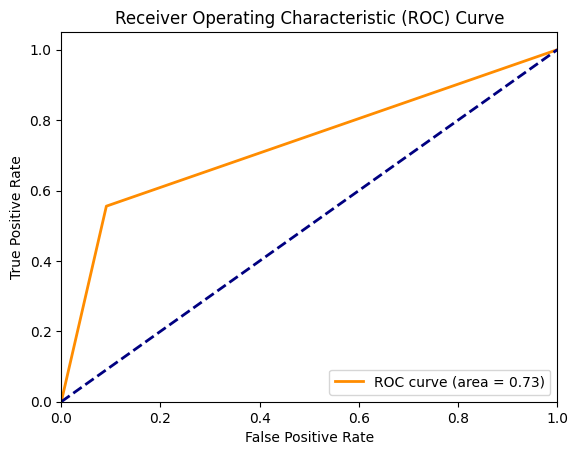

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **SHAP analysis of the trained model**

In [ ]:
!pip install shap
import shap

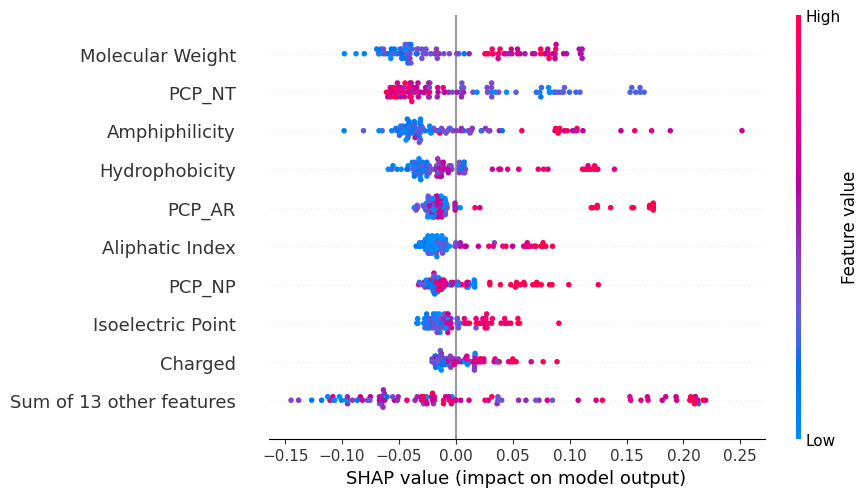

In [ ]:
from shap import Explainer
from shap.plots import beeswarm
explainer = Explainer(best_rf_cmp)
shap_values_CMP = explainer(X)
if len(shap_values_CMP.shape) > 2:
    shap_values_CMP = shap_values_CMP[:, :, 1]  # Select the first output
beeswarm(shap_values_CMP, max_display=10)